After we have created our dataset in the previous [notebook](https://github.com/akcarsten/cook_book/blob/master/01_create_first_dataset.ipynb) it is time to train a classifier to translate the fractur letters to modern typeface. In this notebook we will go for a convolutional neural network (CNN).
So let's get started by importing the libraries.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

%matplotlib inline

Previously we saved our dataste in the IDX data format so here we need to read it back again by using the same [IDX library](https://github.com/akcarsten/convert_IDX). In addition we will also read the .txt file which contains the letter names and that we generated along with the IDX dataset.

In [2]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename, 'r') 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


Before we move on let's have a look at some random letters from the dataset to check if everything worked.

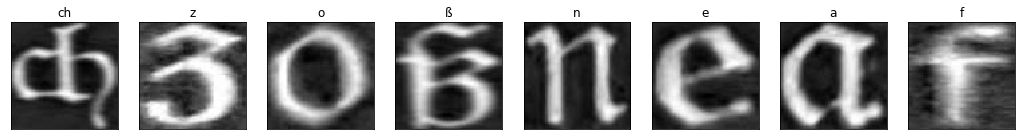

In [3]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='Greys')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[train_labels[image_num]][0])

The following code for is based on the ["Basic classification tutorial"](https://www.tensorflow.org/tutorials/keras/basic_classification) The difference here is that it was addapted to use a CNN instead of a classical multi layer perceptron. The CNN is build with Keras following the example code from [their webpage](https://keras.io/examples/mnist_cnn/).

The first step we have to take is to normalize the data by converting it to a range from 0 to 1 . We will do so by simply dividing every value by the max value 255. 

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In the following code section we will build, compile and train the model. As mentioned in the above we will use Tensorflow and Keras to build a CNN that classifies the letters.  

In [5]:
batch_size = 128
epochs = 500

img_rows = train_images.shape[1]
img_cols = train_images.shape[2]

n_categories = len(class_names)

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_categories, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history =  model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))
score = model.evaluate(test_images, test_labels, verbose=0)
print(score)

W1021 00:46:47.716067 18424 deprecation.py:506] From C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 11912 samples, validate on 5107 samples
Epoch 1/500
11912/11912 [==============================] - 85s 7ms/sample - loss: 3.7146 - acc: 0.0939 - val_loss: 3.6246 - val_acc: 0.1071
Epoch 2/500
11912/11912 [==============================] - 80s 7ms/sample - loss: 3.5546 - acc: 0.1329 - val_loss: 3.4287 - val_acc: 0.1228
Epoch 3/500
11912/11912 [==============================] - 81s 7ms/sample - loss: 3.3922 - acc: 0.1475 - val_loss: 3.2458 - val_acc: 0.1551
Epoch 4/500
11912/11912 [==============================] - 81s 7ms/sample - loss: 3.2670 - acc: 0.1842 - val_loss: 3.0867 - val_acc: 0.2328
Epoch 5/500
11912/11912 [==============================] - 81s 7ms/sample - loss: 3.1478 - acc: 0.2266 - val_loss: 2.9268 - val_acc: 0.3366
Epoch 6/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 3.0202 - acc: 0.2756 - val_loss: 2.7617 - val_acc: 0.4153
Epoch 7/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 2.8789 - acc: 0.3234 - val_lo

Epoch 59/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5782 - acc: 0.8570 - val_loss: 0.2840 - val_acc: 0.9350
Epoch 60/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5829 - acc: 0.8557 - val_loss: 0.2799 - val_acc: 0.9364
Epoch 61/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5657 - acc: 0.8601 - val_loss: 0.2770 - val_acc: 0.9344
Epoch 62/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5629 - acc: 0.8581 - val_loss: 0.2706 - val_acc: 0.9375
Epoch 63/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5541 - acc: 0.8638 - val_loss: 0.2691 - val_acc: 0.9368
Epoch 64/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5541 - acc: 0.8600 - val_loss: 0.2603 - val_acc: 0.9403
Epoch 65/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.5377 - acc: 0.8660 - val_loss: 0.2569 - val_acc: 0.9403
Epoch 66/500


Epoch 117/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3570 - acc: 0.9066 - val_loss: 0.1467 - val_acc: 0.9661
Epoch 118/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3749 - acc: 0.9028 - val_loss: 0.1469 - val_acc: 0.9657
Epoch 119/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3690 - acc: 0.9051 - val_loss: 0.1471 - val_acc: 0.9659
Epoch 120/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3569 - acc: 0.9076 - val_loss: 0.1460 - val_acc: 0.9653
Epoch 121/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3538 - acc: 0.9062 - val_loss: 0.1431 - val_acc: 0.9671
Epoch 122/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3586 - acc: 0.9088 - val_loss: 0.1413 - val_acc: 0.9677
Epoch 123/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.3557 - acc: 0.9087 - val_loss: 0.1416 - val_acc: 0.9673
Epoch 

Epoch 232/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2579 - acc: 0.9370 - val_loss: 0.0908 - val_acc: 0.9792
Epoch 233/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2469 - acc: 0.9375 - val_loss: 0.0914 - val_acc: 0.9790
Epoch 234/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2541 - acc: 0.9359 - val_loss: 0.0911 - val_acc: 0.9777
Epoch 235/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2406 - acc: 0.9382 - val_loss: 0.0888 - val_acc: 0.9792
Epoch 236/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2471 - acc: 0.9366 - val_loss: 0.0916 - val_acc: 0.9781
Epoch 237/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2467 - acc: 0.9380 - val_loss: 0.0915 - val_acc: 0.9785
Epoch 238/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2514 - acc: 0.9340 - val_loss: 0.0903 - val_acc: 0.9790
Epoch 

Epoch 347/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1969 - acc: 0.9496 - val_loss: 0.0749 - val_acc: 0.9839
Epoch 348/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2035 - acc: 0.9469 - val_loss: 0.0744 - val_acc: 0.9843
Epoch 349/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1967 - acc: 0.9521 - val_loss: 0.0748 - val_acc: 0.9847
Epoch 350/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2128 - acc: 0.9445 - val_loss: 0.0774 - val_acc: 0.9832
Epoch 351/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1971 - acc: 0.9480 - val_loss: 0.0739 - val_acc: 0.9837
Epoch 352/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2065 - acc: 0.9470 - val_loss: 0.0755 - val_acc: 0.9841
Epoch 353/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.2059 - acc: 0.9450 - val_loss: 0.0761 - val_acc: 0.9832
Epoch 

Epoch 462/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1767 - acc: 0.9551 - val_loss: 0.0689 - val_acc: 0.9863
Epoch 463/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1759 - acc: 0.9538 - val_loss: 0.0681 - val_acc: 0.9865
Epoch 464/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1745 - acc: 0.9552 - val_loss: 0.0679 - val_acc: 0.9859
Epoch 465/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1628 - acc: 0.9583 - val_loss: 0.0678 - val_acc: 0.9855
Epoch 466/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1678 - acc: 0.9570 - val_loss: 0.0671 - val_acc: 0.9863
Epoch 467/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1734 - acc: 0.9537 - val_loss: 0.0666 - val_acc: 0.9861
Epoch 468/500
11912/11912 [==============================] - 82s 7ms/sample - loss: 0.1705 - acc: 0.9554 - val_loss: 0.0681 - val_acc: 0.9857
Epoch 

Alright, the model is trained now let's have a look at the loss and accuracy and how it changed during the training before we continue.

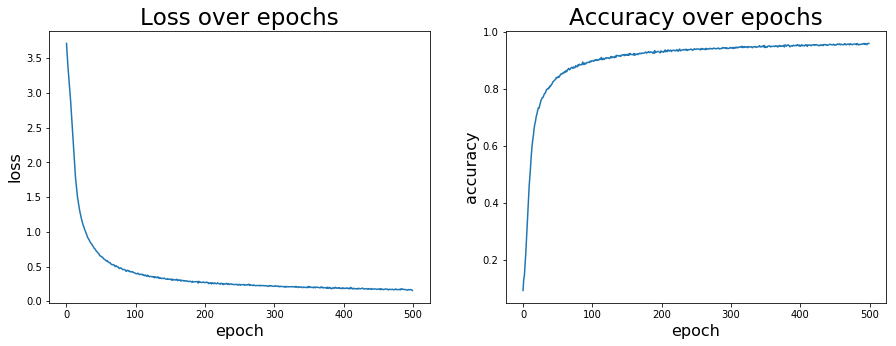

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

And now we should give it a try and test how well the CNN performs on our test data.

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


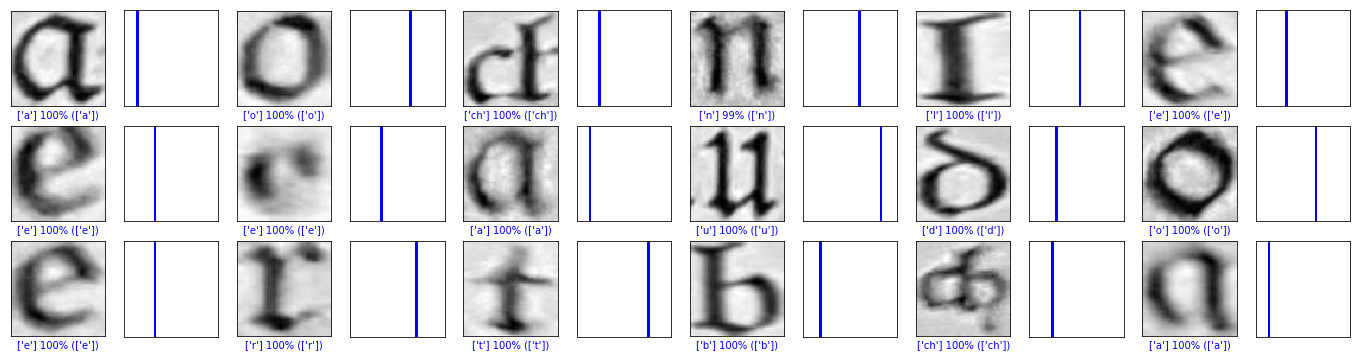

In [7]:
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

predictions = model.predict(test_images)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)


# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

Now if we a are happy with the results we save the model so we can load it later and use it for the live classification in the next notebook.

In [8]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model_conv.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model_conv.h5")
print("Model saved")

Model saved


## TESTING

In [7]:
from tensorflow.keras.models import model_from_json
from convert_data import Idx

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import imageio

from plot_data import Results

from sklearn.preprocessing import StandardScaler

In [4]:
model_path = "./model/model_conv.json"
weights_path = "./model/model_conv.h5"

# Load the model from file
model_conv_file = open(model_path, 'r')
model_conv = model_conv_file.read()
model_conv = model_from_json(model_conv)
model_conv_file.close()

# Load the weights from file and add them to the model
model_conv.load_weights(weights_path)
print("ConvNet model and weights loaded")

# Compile the model
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ConvNet model and weights loaded


In [5]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename, 'r') 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


In [12]:
img_rows = train_images.shape[1]
img_cols = train_images.shape[2]

n_categories = len(class_names)

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

predictions = model_conv.predict(test_images)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


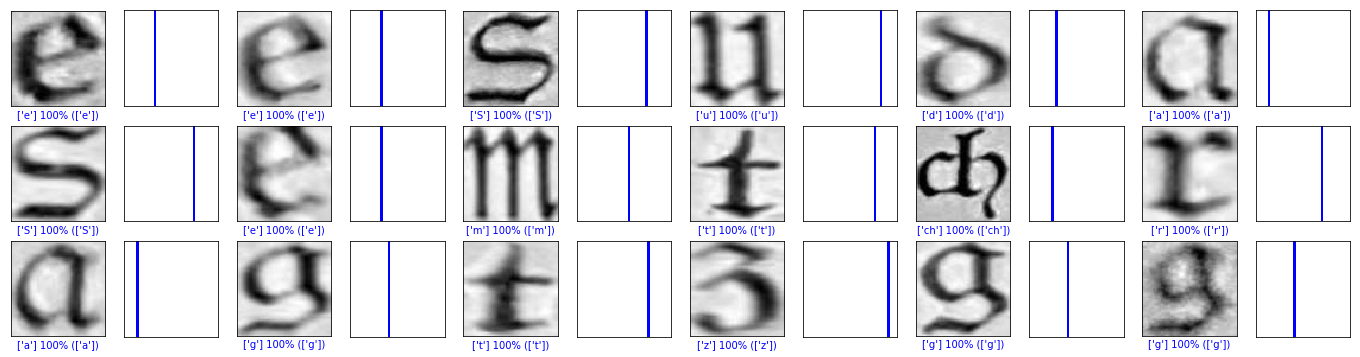

In [11]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [12]:
# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename, 'r') 
class_names =  [str.split(x) for x in file.readlines()]

In [44]:
import cv2
import numpy as np

# Load Yolo
net = cv2.dnn.readNet("D:/yolo/yolov3.weights", "D:/yolo/yolo3.cfg")
classes = 'letter'
#with open("coco.names", "r") as f:
#    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [45]:
# Loading image
img = cv2.imread('./images/09.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [46]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [47]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [48]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [49]:
'''
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'\nfont = cv2.FONT_HERSHEY_PLAIN\nfor i in range(len(boxes)):\n    if i in indexes:\n        x, y, w, h = boxes[i]\n        label = str(classes[class_ids[i]])\n        color = colors[i]\n        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)\n        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)\ncv2.imshow("Image", img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [50]:
np.argmax(out[5:])

304300

In [51]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = 'test'#str(classes[class_ids[0]])
    color = colors[i]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
len(boxes)

1